# Applying Euclidean distance only to High level features

In [25]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt 
import math
from ipynb.fs.full.Utils import createKDeplot
import numpy as np
from sklearn.preprocessing import StandardScaler

In [26]:
from scipy import stats

def applyLogTransformation(df, features, suffix):
    newFeatures = []
    for feature in features:
#         df[feature + '_log'] = np.sqrt(df[feature])
    
        df[feature + suffix] = stats.boxcox(df[feature])[0]
        newFeatures.append(feature + suffix)
        print('skewnees before:', df[feature].skew(), ' after: ', df[feature + suffix].skew())
        
    createKDeplot(df,newFeatures)

In [27]:
df = pd.read_csv('./data/05-RawData.csv')
encodedFeaturesNames = pd.read_csv('./data/05-encodedFeatureNames.csv')
encodedFeaturesNames = encodedFeaturesNames['0'].values.tolist()

In [28]:
# Separating encodedFeatures from continous features
encodedFeatures = df[encodedFeaturesNames]
featuresToScale = df.drop(encodedFeaturesNames, axis=1)


In [30]:
featuresToScale

,Unnamed: 0,id,danceability,energy,speechiness,acousticness,liveness,valence,tempo,year,...,1276,1278,1281,1286,1287,1288,1290,1292,1294,1295
0,0,23,0.494,0.756,0.0432,0.001400,0.1640,0.589,133.337,1973.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,105,0.582,0.744,0.0336,0.000458,0.0405,0.674,133.344,1982.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,118,0.614,0.755,0.0276,0.016200,0.0831,0.645,92.622,1980.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,120,0.319,0.807,0.0388,0.001040,0.1310,0.601,118.097,1982.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,292,0.496,0.527,0.0339,0.195000,0.1380,0.283,155.932,2000.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,3195,5000017,0.453,0.295,0.0291,0.518000,0.2930,0.140,146.022,NaN,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3196,3196,5000018,0.525,0.292,0.0260,0.910000,0.0795,0.133,75.009,NaN,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3197,3197,5000019,0.549,0.283,0.0284,0.661000,0.3570,0.163,76.992,NaN,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3198,3198,5000020,0.493,0.270,0.0278,0.244000,0.1230,0.176,73.001,NaN,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
stats.boxcox(featuresToScale['danceability'])

(array([-0.49505722, -0.41082684, -0.37996639, ..., -0.44252648,
        -0.49600864, -0.49410566]),
 1.0705084194780194)

In [32]:
ids

0            23
1           105
2           118
3           120
4           292
         ...   
3195    5000017
3196    5000018
3197    5000019
3198    5000020
3199    5000023
Name: id, Length: 3200, dtype: int64

In [33]:
featuresToScale = featuresToScale.iloc[:, 2:]

In [34]:
featuresToScale

,danceability,energy,speechiness,acousticness,liveness,valence,tempo,year,0,1,...,1276,1278,1281,1286,1287,1288,1290,1292,1294,1295
0,0.494,0.756,0.0432,0.001400,0.1640,0.589,133.337,1973.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.582,0.744,0.0336,0.000458,0.0405,0.674,133.344,1982.0,0.185185,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.614,0.755,0.0276,0.016200,0.0831,0.645,92.622,1980.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.319,0.807,0.0388,0.001040,0.1310,0.601,118.097,1982.0,0.029412,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.496,0.527,0.0339,0.195000,0.1380,0.283,155.932,2000.0,0.013889,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,0.453,0.295,0.0291,0.518000,0.2930,0.140,146.022,NaN,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3196,0.525,0.292,0.0260,0.910000,0.0795,0.133,75.009,NaN,0.032258,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3197,0.549,0.283,0.0284,0.661000,0.3570,0.163,76.992,NaN,0.084746,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3198,0.493,0.270,0.0278,0.244000,0.1230,0.176,73.001,NaN,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


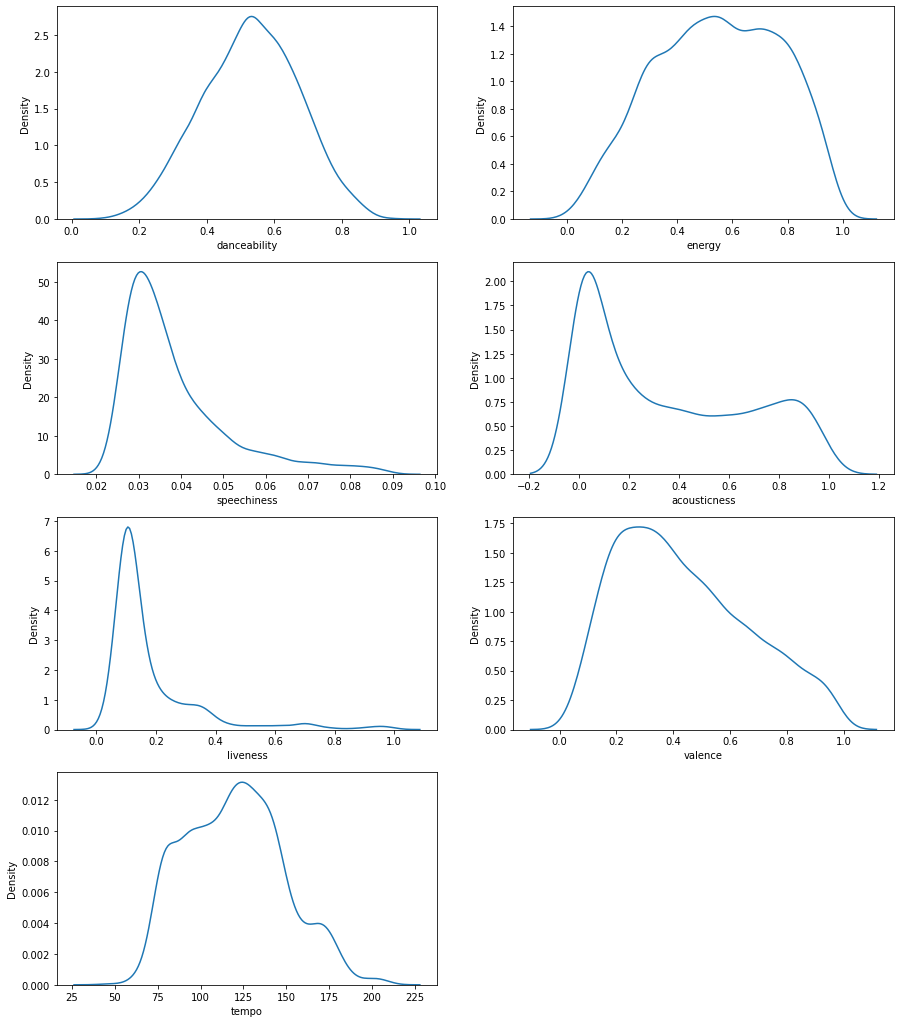

In [35]:
createKDeplot(featuresToScale,['danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo'])

## Managing Skewed variables

In [36]:
## Box Cox requires values different than 0 so no need to add a constant to fix it
featuresToScale[featuresToScale.valence == 0]

,danceability,energy,speechiness,acousticness,liveness,valence,tempo,year,0,1,...,1276,1278,1281,1286,1287,1288,1290,1292,1294,1295


skewnees before: 1.6305040315377852  after:  0.1264419977957835
skewnees before: 0.5019457313641802  after:  -0.3209044723256037
skewnees before: 2.6740307856402503  after:  -0.01915058846343733
skewnees before: 0.4890429508458666  after:  -0.06571293740685841


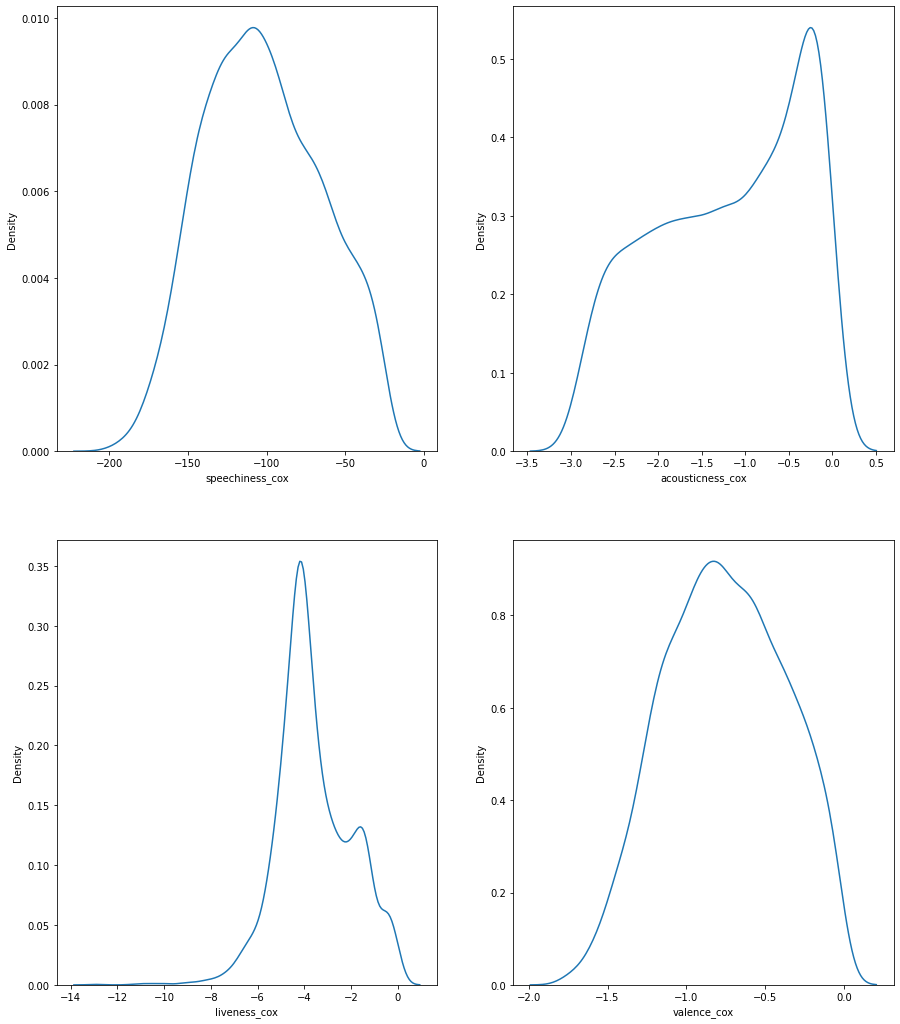

In [37]:
applyLogTransformation(featuresToScale, ['speechiness', 'acousticness', 'liveness', 'valence'], '_cox')

## Defining dataset

In [38]:
dfTransformed = featuresToScale[['speechiness_cox' ,'danceability', 'energy', 'acousticness_cox', 'liveness_cox', 'valence_cox', 'tempo']]

## Centering variables with different means

In [39]:
X = dfTransformed - dfTransformed.mean()
X.describe().round(2)

,speechiness_cox,danceability,energy,acousticness_cox,liveness_cox,valence_cox,tempo
count,3200.00,3200.00,3200.00,3200.00,3200.00,3200.00,3200.00
mean,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00
std,37.11,0.14,0.22,0.85,1.58,0.38,28.70
min,-98.31,-0.44,-0.54,-1.76,-9.31,-1.01,-76.62
25%,-28.14,-0.10,-0.17,-0.72,-0.94,-0.28,-23.28
50%,-2.27,0.00,0.00,0.10,-0.32,-0.00,0.08
75%,28.12,0.10,0.18,0.79,1.06,0.29,19.73
max,77.37,0.42,0.44,1.20,3.60,0.74,90.94


## Scaling variables with different variance

In [40]:
X = dfTransformed / dfTransformed.std()
X.describe().round(2)

,speechiness_cox,danceability,energy,acousticness_cox,liveness_cox,valence_cox,tempo
count,3200.00,3200.00,3200.00,3200.00,3200.00,3200.00,3200.00
mean,-2.75,3.73,2.44,-1.41,-2.28,-1.99,4.18
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-5.40,0.64,0.01,-3.47,-8.15,-4.65,1.51
25%,-3.51,3.03,1.66,-2.25,-2.87,-2.74,3.37
50%,-2.81,3.75,2.45,-1.29,-2.48,-2.01,4.18
75%,-1.99,4.44,3.25,-0.48,-1.60,-1.23,4.86
max,-0.67,6.66,4.41,-0.00,-0.01,-0.06,7.34


## Combining Centering and Scaling

In [41]:
cols = dfTransformed.columns
scaler = StandardScaler()
scaler.fit(dfTransformed)
data_normalized = scaler.transform(dfTransformed)
print('mean: ', data_normalized.mean(axis=0).round(2))
print('std: ', data_normalized.std(axis=0).round(2))

df = pd.DataFrame(data_normalized, columns=cols)

mean:  [-0. -0. -0.  0. -0.  0. -0.]
std:  [1. 1. 1. 1. 1. 1. 1.]


In [42]:
df.iloc[0, :]

speechiness_cox     0.750975
danceability       -0.251299
energy              0.933488
acousticness_cox   -1.728163
liveness_cox        0.380705
valence_cox         0.748311
tempo               0.468964
Name: 0, dtype: float64

## Applying eucledian distance

In [43]:
def euclidean_distance(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))

In [44]:
coverSongId = 1686718
coverSongIndex = ids[ids == coverSongId].index[0]
coverSongVector = df.iloc[coverSongIndex, :]

In [45]:
originalSongId = 180849 # THe Scientist original
originalIndex = ids[ids == originalSongId].index[0]
originalSongVector = df.iloc[originalIndex, :]

In [46]:
coverSongVector

speechiness_cox    -0.963719
danceability       -1.377142
energy             -1.314376
acousticness_cox    1.046479
liveness_cox       -0.741820
valence_cox        -0.964863
tempo               1.184703
Name: 2641, dtype: float64

In [76]:
df

,speechiness_cox,danceability,energy,acousticness_cox,liveness_cox,valence_cox,tempo
0,0.750975,-0.251299,0.933488,-1.728163,0.380705,0.748311,0.468964
1,-0.175934,0.367914,0.879967,-1.851827,-2.948170,1.039033,0.469208
2,-1.189668,0.593082,0.929027,-1.227591,-0.939008,0.942297,-0.949656
3,0.397127,-1.482689,1.160950,-1.765660,-0.004918,0.790726,-0.062038
4,-0.136828,-0.237226,-0.087863,-0.072231,0.088487,-0.564940,1.256235
...,...,...,...,...,...,...,...
3195,-0.886827,-0.539796,-1.122594,0.715180,1.191079,-1.485988,0.910944
3196,-1.561629,-0.033167,-1.135974,1.299950,-1.042276,-1.542686,-1.563340
3197,-1.023172,0.135709,-1.176115,0.954813,1.415647,-1.310186,-1.494247
3198,-1.146918,-0.258336,-1.234095,0.086555,-0.121421,-1.216967,-1.633304


In [49]:
ranking = []
for index in range(0, len(df)):
    ranking.append([ids[index], euclidean_distance(df.iloc[index, :], originalSongVector)])
ranking    

[[23, 4.616478830198888],
 [105, 4.979968598399976],
 [118, 3.9442070894939447],
 [120, 4.84592435959656],
 [292, 2.3736896414492574],
 [407, 4.631699644048546],
 [418, 3.909787035046119],
 [456, 3.1603359493711847],
 [467, 4.33984941349682],
 [469, 3.612425935067688],
 [635, 2.7422950865859046],
 [652, 3.1190156118148296],
 [816, 4.949058931381554],
 [830, 1.5153875974526652],
 [836, 3.6398222919284144],
 [1334, 5.192958049910836],
 [1345, 2.947680977867714],
 [1395, 3.9959004947124654],
 [1433, 3.3424807040715554],
 [2147, 4.925723974121919],
 [2148, 3.886567846458354],
 [2220, 3.490028636657198],
 [2535, 5.983699481372094],
 [3118, 3.9937610872568783],
 [3165, 1.7642809956273624],
 [3337, 3.106910023287132],
 [3991, 4.63874720097833],
 [4019, 4.878438477820525],
 [4041, 3.275849907084715],
 [4084, 3.9055936864210365],
 [4169, 3.9368059367983266],
 [5643, 3.7302215248442643],
 [5909, 5.505690629410255],
 [6090, 4.087465895487954],
 [6097, 4.996129368960708],
 [6109, 2.311604822460373

In [51]:
ranksDF = pd.DataFrame(ranking)
ranksDF = ranksDF.rename(columns={0: "id", 1: "rank"})
ranksDF

,id,rank
0,23,4.616479
1,105,4.979969
2,118,3.944207
3,120,4.845924
4,292,2.373690
...,...,...
3195,5000017,2.231969
3196,5000018,2.785729
3197,5000019,3.246152
3198,5000020,3.022410


In [52]:
ranksDF = ranksDF.sort_values(by="rank")
ranksDF.reset_index(drop=True, inplace=True)
ranksDF

,id,rank
0,180849,0.000000
1,924061,0.874438
2,188071,0.978993
3,1874688,1.013196
4,1949223,1.036086
...,...,...
3195,390605,6.468922
3196,140717,6.511206
3197,961594,6.609275
3198,1683393,6.807739


🥳 First recommendation

In [53]:
ranksDF[ranksDF['id']==coverSongId]

,id,rank
231,1686718,2.130901


### Rank of the song is 264 original vs cover

In [54]:
ranksDF[ranksDF['id']>5000000]

,id,rank
23,5000008,1.304862
71,5000023,1.667640
230,5000013,2.130901
286,5000017,2.231969
373,5000011,2.374815
700,5000018,2.785729
746,5000001,2.830145
936,5000020,3.022410
981,5000007,3.067746
1185,5000019,3.246152


In [57]:
df

,speechiness_cox,danceability,energy,acousticness_cox,liveness_cox,valence_cox,tempo
0,0.750975,-0.251299,0.933488,-1.728163,0.380705,0.748311,0.468964
1,-0.175934,0.367914,0.879967,-1.851827,-2.948170,1.039033,0.469208
2,-1.189668,0.593082,0.929027,-1.227591,-0.939008,0.942297,-0.949656
3,0.397127,-1.482689,1.160950,-1.765660,-0.004918,0.790726,-0.062038
4,-0.136828,-0.237226,-0.087863,-0.072231,0.088487,-0.564940,1.256235
...,...,...,...,...,...,...,...
3195,-0.886827,-0.539796,-1.122594,0.715180,1.191079,-1.485988,0.910944
3196,-1.561629,-0.033167,-1.135974,1.299950,-1.042276,-1.542686,-1.563340
3197,-1.023172,0.135709,-1.176115,0.954813,1.415647,-1.310186,-1.494247
3198,-1.146918,-0.258336,-1.234095,0.086555,-0.121421,-1.216967,-1.633304


In [58]:
ids

0            23
1           105
2           118
3           120
4           292
         ...   
3195    5000017
3196    5000018
3197    5000019
3198    5000020
3199    5000023
Name: id, Length: 3200, dtype: int64

In [71]:
indexSecondSong = ids[ids == 924061].index[0]

In [73]:
df.iloc[indexSecondSong, : ]

speechiness_cox    -1.345591
danceability        0.557900
energy             -0.466967
acousticness_cox    1.186152
liveness_cox       -0.511440
valence_cox        -0.765740
tempo               0.636105
Name: 1712, dtype: float64

In [74]:
indexSecondSong = ids[ids == 188071].index[0]
df.iloc[indexSecondSong, : ]

speechiness_cox    -1.487558
danceability       -0.209080
energy             -0.926352
acousticness_cox    1.028867
liveness_cox       -0.374303
valence_cox        -1.392391
tempo               0.576628
Name: 672, dtype: float64

### Original

In [75]:
indexSecondSong = ids[ids == 180849].index[0]
df.iloc[indexSecondSong, : ]

speechiness_cox    -2.025156
danceability        0.192001
energy             -0.466967
acousticness_cox    1.059560
liveness_cox       -0.337578
valence_cox        -0.971158
tempo               0.919829
Name: 647, dtype: float64